In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import timedelta

/Users/prathamesh/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:

import yfinance as yf 
df = yf.download('TATAMOTORS.NS',start="2012-05-07", end="2022-05-06")
# df = yf.download('TATAMOTORS.NS', period="1y")

[*********************100%***********************]  1 of 1 completed


In [3]:
# df.set_index('Date', inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-28,434.799988,439.200012,430.799988,436.049988,436.049988,13875650
2022-04-29,440.200012,447.750000,436.000000,437.600006,437.600006,21991752
2022-05-02,437.950012,442.950012,428.500000,432.850006,432.850006,18945234
2022-05-04,437.950012,440.600006,420.700012,423.500000,423.500000,14934742
2022-05-05,429.000000,434.000000,423.700012,426.299988,426.299988,12240729


In [4]:
df.shape

(2464, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2464 entries, 2012-05-07 to 2022-05-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2464 non-null   float64
 1   High       2464 non-null   float64
 2   Low        2464 non-null   float64
 3   Close      2464 non-null   float64
 4   Adj Close  2464 non-null   float64
 5   Volume     2464 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.8 KB


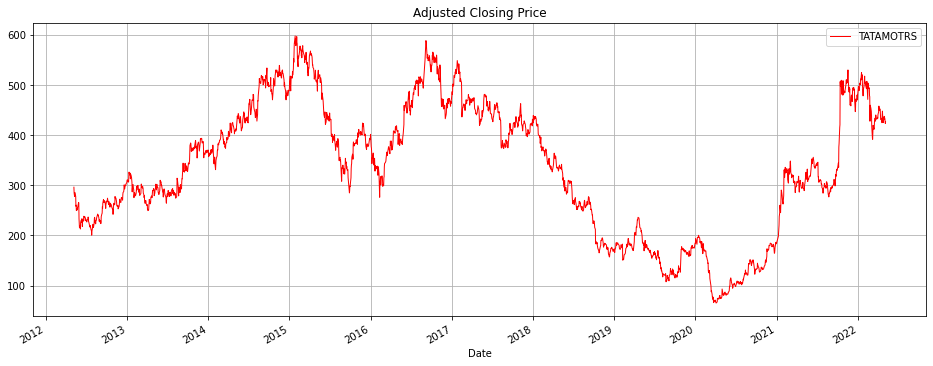

In [6]:
df['Adj Close'].plot(label='TATAMOTRS', figsize=(16, 6), title='Adjusted Closing Price', color='red', linewidth=1.0, grid=True)
plt.legend()

In [7]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = df['Adj Close']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

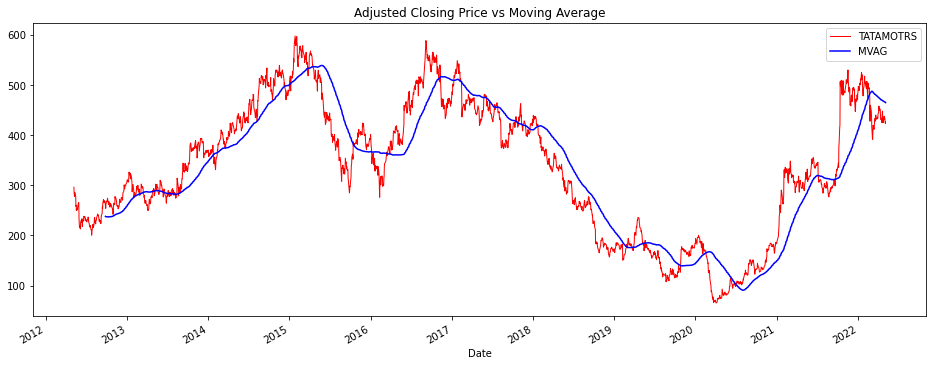

In [8]:
# Visualizing Rolling Mean and Adjusted Closing Price together

df['Adj Close'].plot(label='TATAMOTRS', figsize=(16,6), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

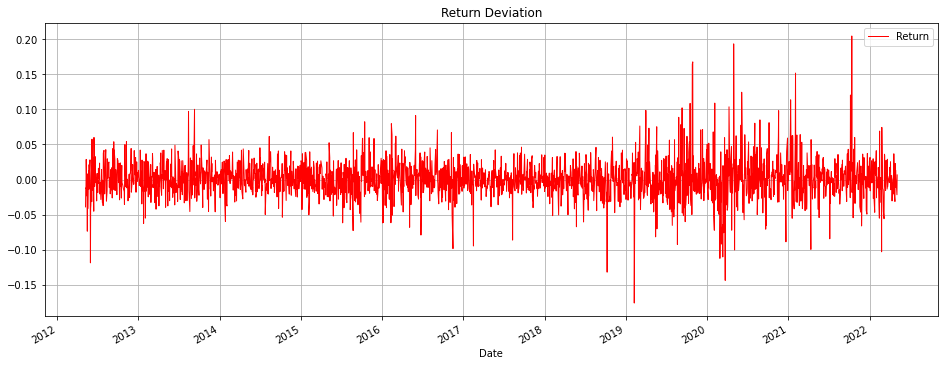

In [9]:
# Return Deviation measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome

rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(16, 6), title='Return Deviation', color='red', linewidth=1.0, grid=True)
plt.legend()

In [10]:
predict_days = 30

In [11]:
# Shifting by the Number of Predict days for Prediction array

df['Prediction'] = df['Adj Close'].shift(-predict_days)

In [12]:
# Dropping the Prediction Row

X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days
# print(X)
print(X.shape)

(2434, 6)


In [13]:
# Creating the Prediction Row

y = np.array(df['Prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(2434,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1947, 6)
(1947,)
(487, 6)
(487,)


In [15]:
model = RandomForestRegressor().fit(X_train, y_train)

In [16]:
model_score = model.score(X_train, y_train)
print('Random Model score:', model_score)

Random Model score: 0.9841025387312241


In [17]:
model_score = model.score(X_test, y_test)
print('Random Model score:', model_score)

Random Model score: 0.8669538581434559


In [18]:
predicted=model.predict(X_test)

In [19]:
print(X_test)

[[4.80100006e+02 4.89299988e+02 4.78950012e+02 4.86100006e+02
  4.85903229e+02 5.98300700e+06]
 [4.66793182e+02 4.72432678e+02 4.61401001e+02 4.70256042e+02
  4.70065674e+02 4.14808400e+06]
 [2.87250000e+02 3.04549988e+02 2.80549988e+02 3.02850006e+02
  3.02850006e+02 1.16874853e+08]
 ...
 [5.07799988e+02 5.10500000e+02 5.01100006e+02 5.03200012e+02
  5.03200012e+02 3.74633200e+06]
 [2.63177155e+02 2.68915619e+02 2.63177155e+02 2.67382050e+02
  2.64336731e+02 6.69906100e+06]
 [4.93899994e+02 5.03500000e+02 4.93450012e+02 4.99250000e+02
  4.99250000e+02 7.66551900e+06]]


In [21]:
# Define the Real & Prediction Values

X_predict = np.array(df.drop(['Prediction'], axis=1))[-predict_days:]

model_predict_prediction = model.predict(X_predict)

model_real_prediction = model.predict(np.array(df.drop(['Prediction'], axis=1)))

In [22]:
predicted_dates = []
recent_date = df.index.max()
display_at = 1000
alpha = 0.5

for i in range(predict_days):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)

In [32]:
df.head()
df.index[display_at:]

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14',
               ...
               '2022-04-21', '2022-04-22', '2022-04-25', '2022-04-26',
               '2022-04-27', '2022-04-28', '2022-04-29', '2022-05-02',
               '2022-05-04', '2022-05-05'],
              dtype='datetime64[ns]', name='Date', length=1464, freq=None)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

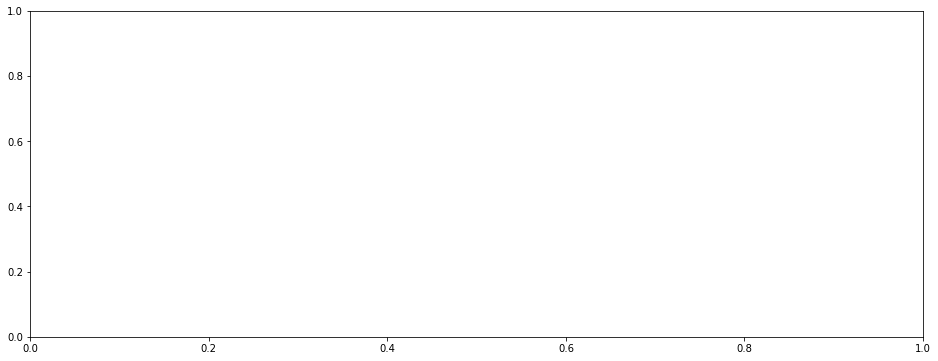

In [26]:
plt.figure(figsize=(16, 6))
plt.plot(df.index[display_at:], model_real_prediction[display_at:], label='Random Forest Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, model_predict_prediction, label='365 days Prediction', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Adj Close'][display_at:], label='Actual', color='red')
plt.legend()

In [ ]:
model_predict_prediction

: 